## Goal is to predict or classify Life Expectancy
- We want to first determine which variables are useful

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn import linear_model

data_raw = pd.read_csv("/Users/rishabtirupathi/Desktop/UIUC/Spring 2024/STAT 432/Final Project/Life Expectancy Data.csv")
country_list = sorted(list(set((data_raw['Country']))))
data_raw.columns = [i.strip() for i in data_raw.columns]

colours = random.sample(list(mcolors.XKCD_COLORS.keys()), len(country_list))

data_raw
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala'

#### Data preprocessing
- Determine any missing data, linearly interpolate them
- Use correlation analysis to determine which features to use

/var/folders/68/886mn3q57q9f6lcdshz9b8j80000gn/T/ipykernel_37933/2513325859.py:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method = 'linear')


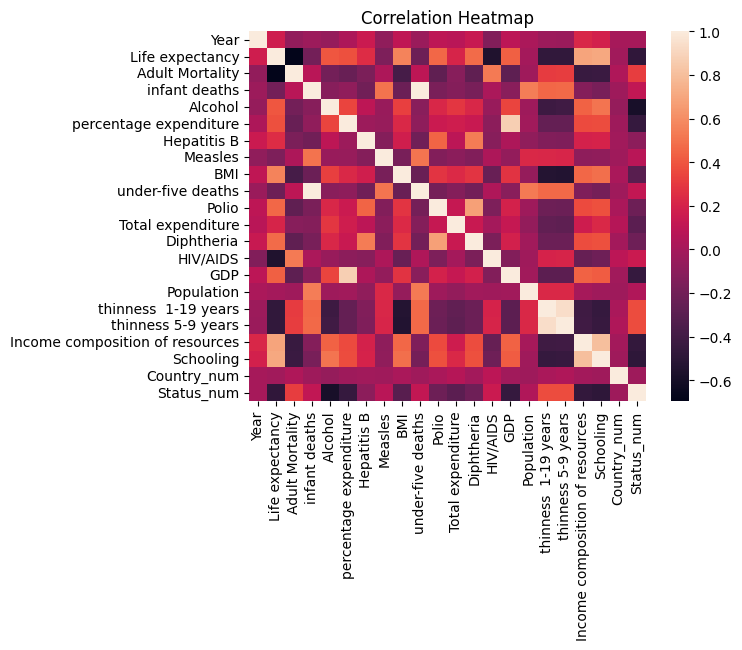

In [163]:
df = data_raw.copy()

## Make categorical variables in quantitative
df['Country_num'] = df['Country'].apply(lambda x: country_list.index(x) + 1)
df['Status_num'] = df['Status'].apply(lambda x: 1 if x == 'Developing' else 0)
df['Colour'] = df['Country'].apply(lambda x: colours[country_list.index(x)])

df = df.interpolate(method = 'linear')

corr_df = df.drop(columns=['Country', 'Status', 'Colour']).corr()
sns.heatmap(corr_df)
plt.title("Correlation Heatmap")
plt.show()

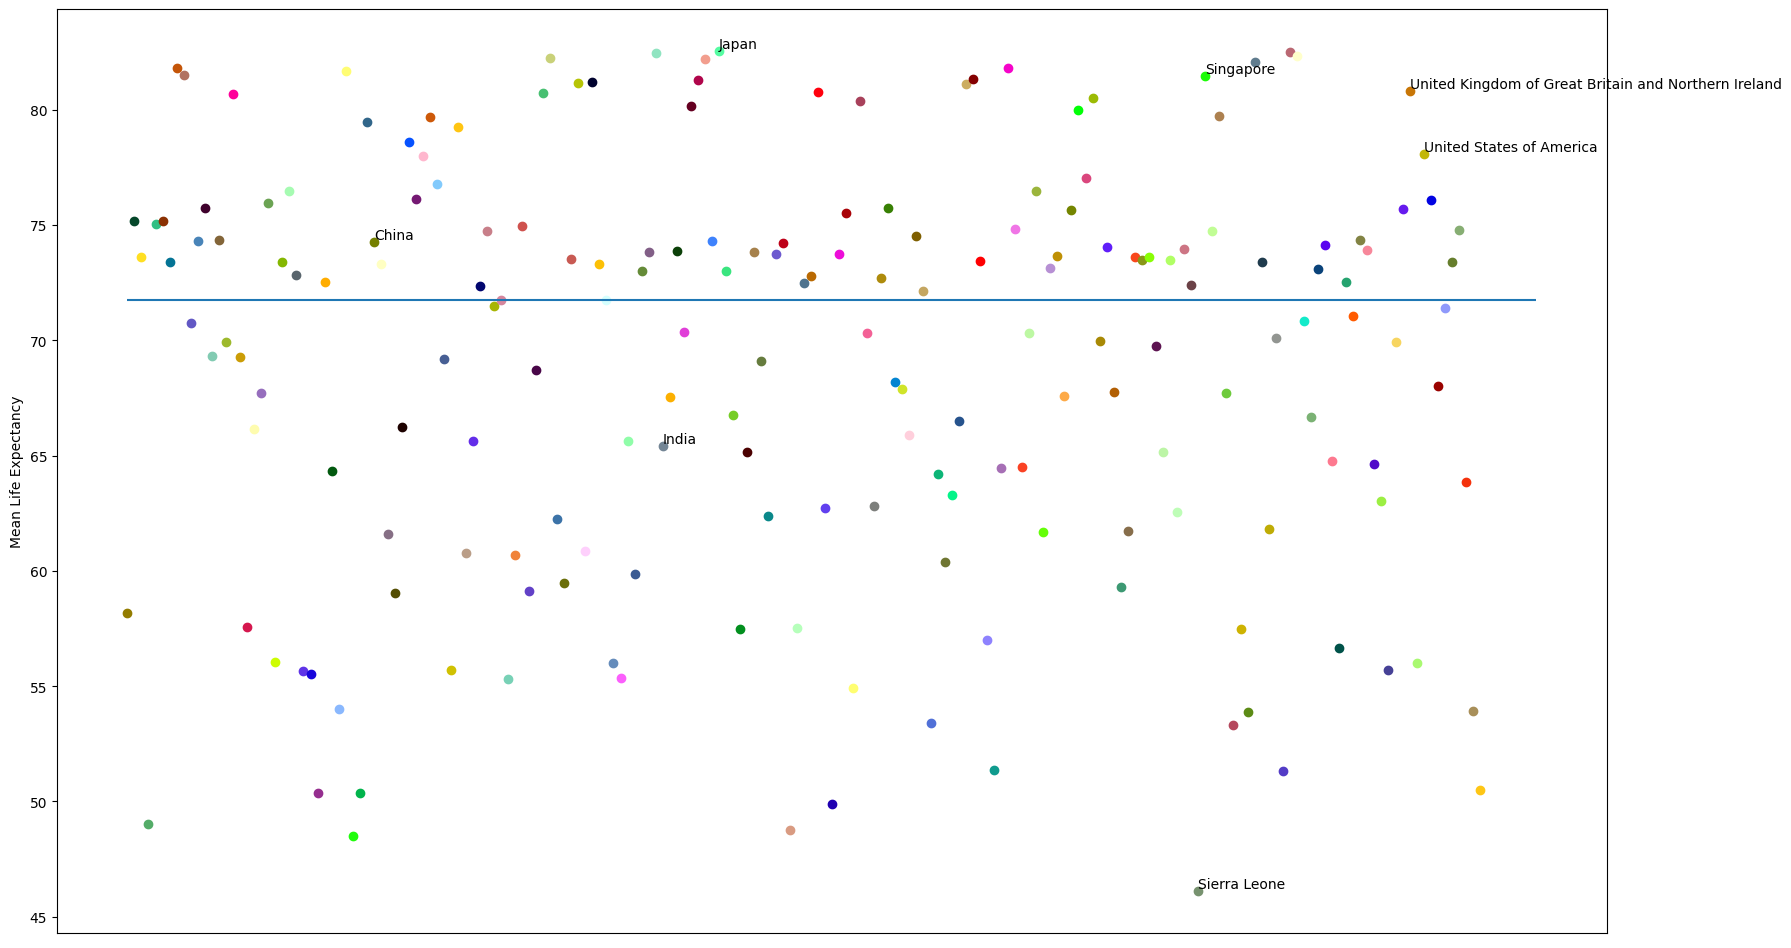

In [180]:
df['Mean LE'] = df.groupby(by = 'Country')['Life expectancy'].transform('mean')
trunc_df = df.copy()
trunc_df = trunc_df[['Country', 'Mean LE', 'Colour']].drop_duplicates().reset_index(drop = True)
key_countries = ['United States of America', 'United Kingdom of Great Britain and Northern Ireland', 'Singapore', 'India', 'China']
max_mle = max(trunc_df['Mean LE'])
min_mle = min(trunc_df['Mean LE'])

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 12))
for country, mean_le, colour in zip(trunc_df['Country'], trunc_df['Mean LE'], trunc_df['Colour']):
    axes.scatter(country, mean_le, c = colour, label = country)

    if country in key_countries or mean_le in [max_mle, min_mle]:
        plt.text(country, mean_le, country, va = 'bottom')

axes.set_xticks([])
axes.set_ylabel("Mean Life Expectancy")
axes.hlines(y = trunc_df['Mean LE'].median(), xmin = 0, xmax = 200)
# axes.legend()
plt.show()

#### Logistic Regression

#### Random Forest